In [103]:
from sklearn import feature_selection
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [55]:
data = pd.read_csv("caravan.csv")

In [56]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [57]:
X.head()

,Customer Subtype,Number of houses,Avg size household,Avg Age,Customer main type,Roman catholic,Protestant,Other religion,No religion,Married,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of re policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,1,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,1,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,1,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,1,0,0,0,0,0


In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: CARAVAN POLICY, dtype: int64

## Univariate Selection

In [90]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [91]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [92]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs','Score']  

In [94]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                              Specs       Score
46                        Contribution car policies  380.691708
60                       Contribution boat policies  191.696446
0                                  Customer Subtype  190.696878
58                       Contribution fire policies  100.332586
29                                     Rented house   82.130521
63  Contribution social security insurance policies   80.693160
67                           Number of car policies   78.757821
15                             High level education   75.173970
81                          Number of boat policies   72.088379
30                                      Home owners   71.638337


## Feature Importance

In [105]:
# RandomForestClassifier
model_1 = ExtraTreesClassifier(n_estimators= 100)
model_1.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

What is Random Forest? It consists of a large number of individual decision trees that operate as an ensemble. 
The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds.
Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.
Every sampling we randomly choose the subset of features and instances to build up a tree. 
After several times, the forest is constructed by 100 trees. 
And we collect the classification result from every tree, and then let the majority be our final decision. 

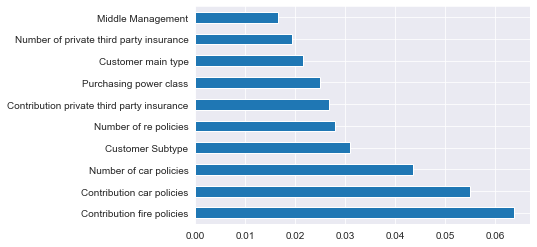

In [106]:
feat_importances = pd.Series(model_1.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [107]:
# ExtraTreeClassifier
model_2 = ExtraTreesClassifier(n_estimators= 100)
model_2.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

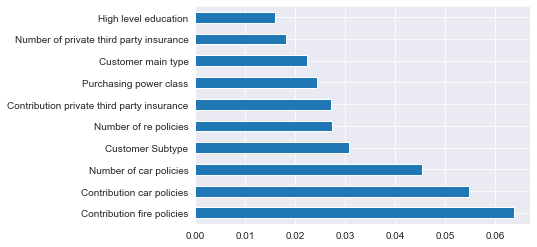

In [108]:
feat_importances = pd.Series(model_2.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Correlation Matrix 